In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chisquare
from scipy.stats import mannwhitneyu
from scipy import stats as sp_stats
from scipy.stats import linregress
df_total = pd.read_csv("../data/steamspy_enriched.csv")
df_enriched=df_total

C:\Users\migue\AppData\Local\Temp\ipykernel_20360\889907566.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_parts = ax.boxplot(


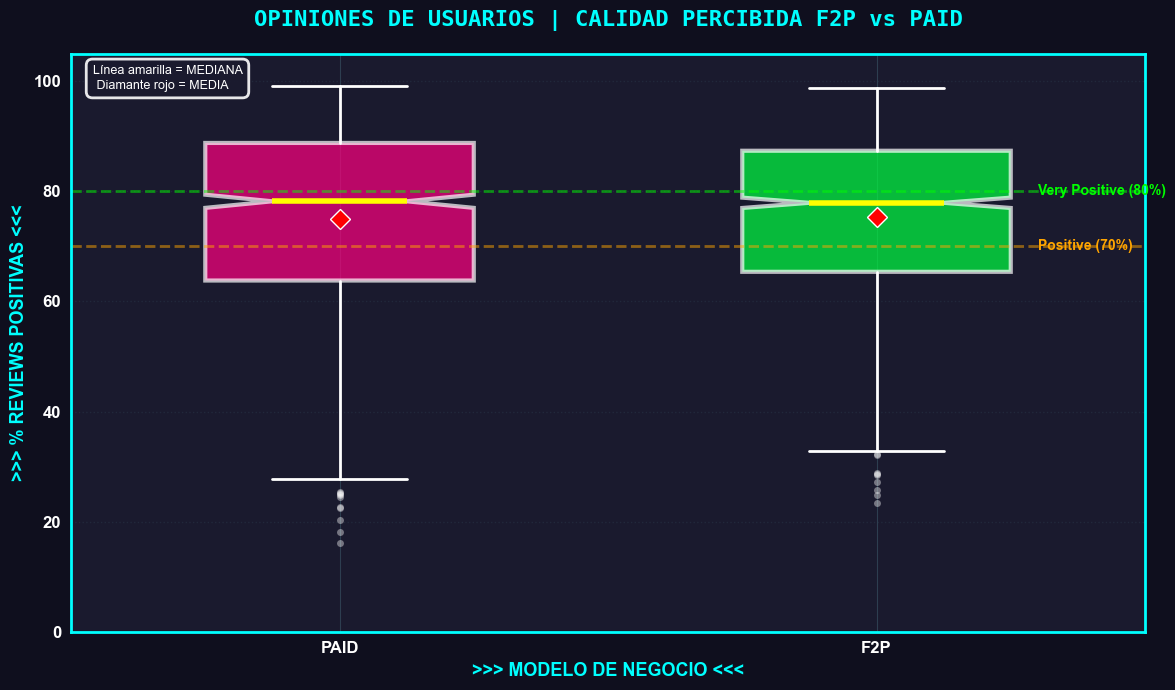

In [2]:
# Estilo gaming
plt.style.use('dark_background')
sns.set_style("darkgrid", {
    "axes.facecolor": "#1a1a2e",
    "figure.facecolor": "#0f0f1e",
    "grid.color": "#2d3e50",
    "grid.alpha": 0.3
})
COLOR_F2P = '#00ff41'
COLOR_PAID = '#ff0080'
COLOR_TEXT = '#00ffff'
# Preparamos los datos
# Calcular ratio de positividad
df_total['total_reviews'] = df_total['positive'] + df_total['negative']
df_total['positive_ratio'] = (df_total['positive'] / df_total['total_reviews']) * 100
# Filtrar juegos con reviews suficientes (mínimo 10)
df_opinions = df_total[df_total['total_reviews'] >= 10].copy()
# Separar por modelo
paid_ratings = df_opinions[df_opinions['is_free'] == False]['positive_ratio']
f2p_ratings = df_opinions[df_opinions['is_free'] == True]['positive_ratio']
# Test Mann-Whitney
stat, p_value = mannwhitneyu(paid_ratings, f2p_ratings, alternative='two-sided')
if p_value < 0.001:
    print("Diferencia significativa (p < 0.001)")
# Gráfico
fig, ax = plt.subplots(figsize=(12, 7))
# Datos para boxplot
data_plot = [paid_ratings, f2p_ratings]
labels = ['PAID', 'F2P']
# Boxplot
box_parts = ax.boxplot(
    data_plot,
    labels=labels,
    patch_artist=True,
    widths=0.5,
    showfliers=True,
    notch=True,
    showmeans=True
)
# Colorear boxes
colors = [COLOR_PAID, COLOR_F2P]
for patch, color in zip(box_parts['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
    patch.set_edgecolor('white')
    patch.set_linewidth(3)
# Colorear elementos
for element in ['whiskers', 'caps']:
    plt.setp(box_parts[element], color='white', linewidth=2)
plt.setp(box_parts['medians'], color='yellow', linewidth=4)
plt.setp(box_parts['means'], markerfacecolor='red', marker='D', 
         markersize=10, markeredgecolor='white', linewidth=2)
plt.setp(box_parts['fliers'], markerfacecolor='white', marker='o',
         markersize=5, alpha=0.4, markeredgecolor='none')
# Líneas de referencia Steam
ax.axhline(70, color='orange', linestyle='--', linewidth=2, alpha=0.5)
ax.text(2.3, 70, 'Positive (70%)', va='center', fontsize=10, 
        color='orange', fontweight='bold')
ax.axhline(80, color='#00ff00', linestyle='--', linewidth=2, alpha=0.5)
ax.text(2.3, 80, 'Very Positive (80%)', va='center', fontsize=10, 
        color='#00ff00', fontweight='bold')
# Leyenda de símbolos
legend_text = "Línea amarilla = MEDIANA\n Diamante rojo = MEDIA"
ax.text(0.02, 0.98, legend_text, transform=ax.transAxes,
        fontsize=9, verticalalignment='top',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='#1a1a2e',
                 edgecolor='white', linewidth=2, alpha=0.9),
        color='white')
# Título y labels
ax.set_title('OPINIONES DE USUARIOS | CALIDAD PERCIBIDA F2P vs PAID',
             fontsize=16, fontweight='bold', color=COLOR_TEXT,
             family='monospace', pad=20)
ax.set_ylabel('>>> % REVIEWS POSITIVAS <<<', fontsize=13,
              color=COLOR_TEXT, fontweight='bold')
ax.set_xlabel('>>> MODELO DE NEGOCIO <<<', fontsize=13,
              color=COLOR_TEXT, fontweight='bold')
ax.set_ylim(0, 105)
# Ticks
ax.tick_params(axis='both', labelsize=12, colors='white')
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_color('white')
    label.set_fontweight('bold')
# Grid y spines
ax.grid(True, linestyle=':', linewidth=1, alpha=0.4, axis='y')
for spine in ax.spines.values():
    spine.set_edgecolor(COLOR_TEXT)
    spine.set_linewidth(2)
plt.tight_layout()
plt.show();

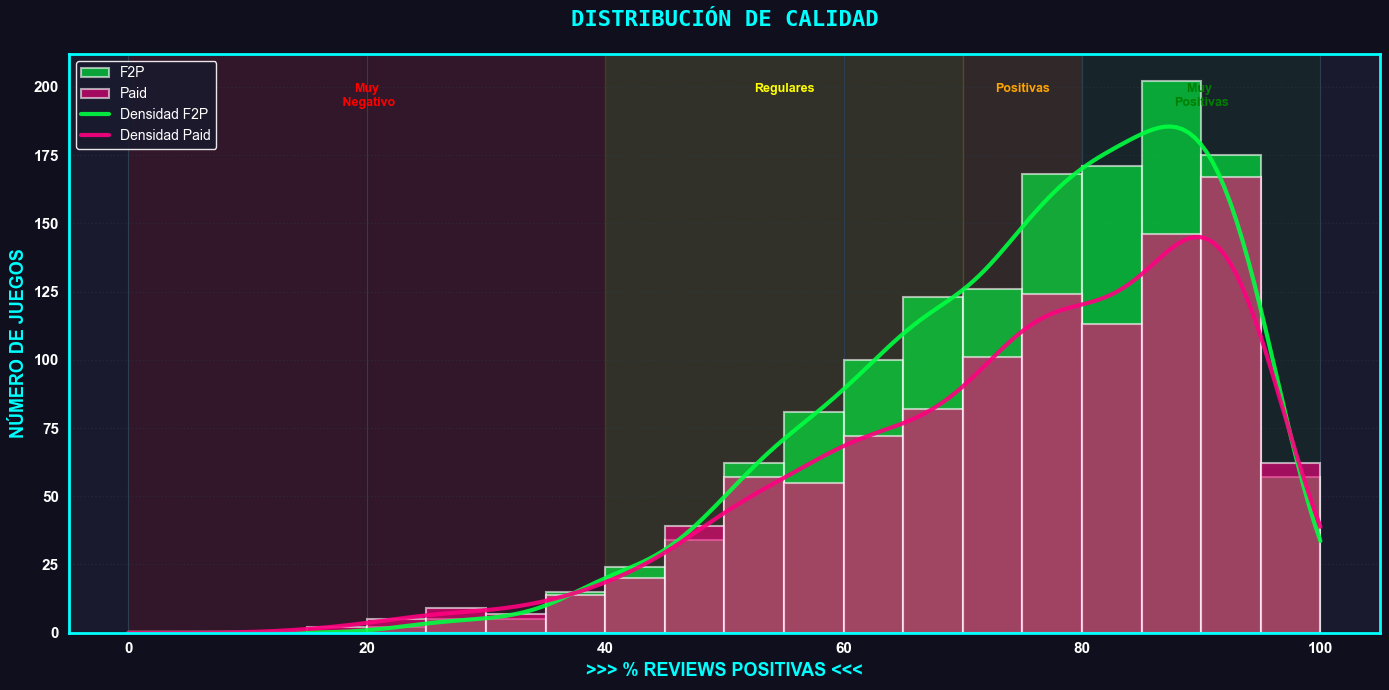

In [3]:
# Estilo gaming
plt.style.use('dark_background')
sns.set_style("darkgrid", {
    "axes.facecolor": "#1a1a2e",
    "figure.facecolor": "#0f0f1e",
    "grid.color": "#2d3e50",
    "grid.alpha": 0.3
})
COLOR_F2P = '#00ff41'
COLOR_PAID = '#ff0080'
COLOR_TEXT = '#00ffff'
# Volvemos a preparar los datos
df_total['total_reviews'] = df_total['positive'] + df_total['negative']
df_total['positive_ratio'] = (df_total['positive'] / df_total['total_reviews']) * 100
df_opinions = df_total[df_total['total_reviews'] >= 10].copy()
paid_ratings = df_opinions[df_opinions['is_free'] == False]['positive_ratio']
f2p_ratings = df_opinions[df_opinions['is_free'] == True]['positive_ratio']
# Gráfico
fig, ax = plt.subplots(figsize=(14, 7))
# Histogramas superpuestos
bins = np.arange(0, 105, 5)
ax.hist(f2p_ratings, bins=bins, alpha=0.6, color=COLOR_F2P, 
        edgecolor='white', linewidth=1.5, label='F2P', density=False)
ax.hist(paid_ratings, bins=bins, alpha=0.6, color=COLOR_PAID, 
        edgecolor='white', linewidth=1.5, label='Paid', density=False)
# Líneas de densidad (KDE)
densidad_f2p = sp_stats.gaussian_kde(f2p_ratings)
densidad_paid = sp_stats.gaussian_kde(paid_ratings)
x_range = np.linspace(0, 100, 200)
y_f2p = densidad_f2p(x_range) * len(f2p_ratings) * 5  # Escalar al histograma
y_paid = densidad_paid(x_range) * len(paid_ratings) * 5
ax.plot(x_range, y_f2p, color=COLOR_F2P, linewidth=3, 
        linestyle='-', alpha=0.9, label='Densidad F2P')
ax.plot(x_range, y_paid, color=COLOR_PAID, linewidth=3, 
        linestyle='-', alpha=0.9, label='Densidad Paid')
# Zonas de Steam (fondo coloreado)
ax.axvspan(0, 40, alpha=0.1, color='red', zorder=0)
ax.text(20, ax.get_ylim()[1]*0.95, 'Muy\n Negativo', 
        ha='center', va='top', fontsize=9, color='red', fontweight='bold')

ax.axvspan(40, 70, alpha=0.1, color='yellow', zorder=0)
ax.text(55, ax.get_ylim()[1]*0.95, 'Regulares', 
        ha='center', va='top', fontsize=9, color='yellow', fontweight='bold')

ax.axvspan(70, 80, alpha=0.1, color='orange', zorder=0)
ax.text(75, ax.get_ylim()[1]*0.95, 'Positivas', 
        ha='center', va='top', fontsize=9, color='orange', fontweight='bold')

ax.axvspan(80, 100, alpha=0.1, color='green', zorder=0)
ax.text(90, ax.get_ylim()[1]*0.95, 'Muy \nPositivas', 
        ha='center', va='top', fontsize=9, color='green', fontweight='bold')
# Título y labels
ax.set_title('DISTRIBUCIÓN DE CALIDAD',
             fontsize=16, fontweight='bold', color=COLOR_TEXT,
             family='monospace', pad=20)
ax.set_xlabel('>>> % REVIEWS POSITIVAS <<<', fontsize=13,
              color=COLOR_TEXT, fontweight='bold')
ax.set_ylabel('NÚMERO DE JUEGOS', fontsize=13,
              color=COLOR_TEXT, fontweight='bold')
# Leyenda
legend = ax.legend(loc='upper left', fontsize=10, framealpha=0.9,
                   facecolor='#1a1a2e', edgecolor='white')
for text in legend.get_texts():
    text.set_color('white')
# Ticks
ax.tick_params(axis='both', labelsize=11, colors='white')
for label in ax.get_xticklabels():
    label.set_color('white')
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_color('white')
    label.set_fontweight('bold')
# Grid y spines
ax.grid(True, linestyle=':', linewidth=1, alpha=0.4, axis='y')
for spine in ax.spines.values():
    spine.set_edgecolor(COLOR_TEXT)
    spine.set_linewidth(2)
plt.tight_layout()
plt.show();